# PUBG data analysis - EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import random
random.seed(1234)
import time
import gc

#### ML
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

- **playerId** - Integer ID to identify a player.
- **matchId** - Integer ID to identify match. There are no matches that are in both the training and testing set.
- **assists** - Number of enemy players this player damaged that were killed by teammates.
- **boosts** - Number of boost items used.
- **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
- **DBNOs** - Number of enemy players knocked.
- **headshotKills** - Number of enemy players killed with headshots.
- **heals** - Number of healing items used.
- **killPlace** - Ranking in match of number of enemy players killed.
- **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- **kills** - Number of enemy players killed.
- **killStreaks** - Max number of enemy players killed in a short amount of time.
- **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- **matchDuration** - How long a match takes.
- **matchType** - Type of a match: squad, duo, solo, squad-fpp, duo-fpp, solo-fpp.
- **revives** - Number of times this player revived teammates.
- **rideDistance** - Total distance traveled in vehicles measured in meters.
- **roadKills** - Number of kills while in a vehicle.
- **swimDistance** - Total distance traveled by swimming measured in meters.
- **teamKills** - Number of times this player killed a teammate.
- **vehicleDestroys** - Number of vehicles destroyed.
- **walkDistance** - Total distance traveled on foot measured in meters.
- **weaponsAcquired** - Number of weapons picked up.
- **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
- **winPlace** - The final ranking in a match.

In [5]:
# read data
data = pd.read_csv('data.csv')
data_new = pd.read_csv('data_1203.csv')

## Exploratory Data Analysis

In [4]:
len(data)

173087

In [3]:
data.head(3).transpose()

,0,1,2
playerId,account.84a80903746146a6a031917e09d8726b,account.5514ef172fc94ace81da76239ef14bb1,account.33e009e03a914f16a4e55e6e37c050cd
matchId,0570548f-e758-4320-bbf8-6aa9c959e835,0570548f-e758-4320-bbf8-6aa9c959e835,0570548f-e758-4320-bbf8-6aa9c959e835
assists,0,0,0
boosts,1,0,1
damageDealt,100,122.394,96.555
DBNOs,1,0,0
headshotKills,0,0,0
heals,3,0,0
killPlace,27,61,50
kills,1,0,0


In [4]:
data.isnull().sum() #no missing values

playerId           0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPlace           0
dtype: int64

In [5]:
data['matchType'].value_counts()

squad        87573
duo          39323
solo         32992
squad-fpp     8198
duo-fpp       3282
solo-fpp      1719
Name: matchType, dtype: int64

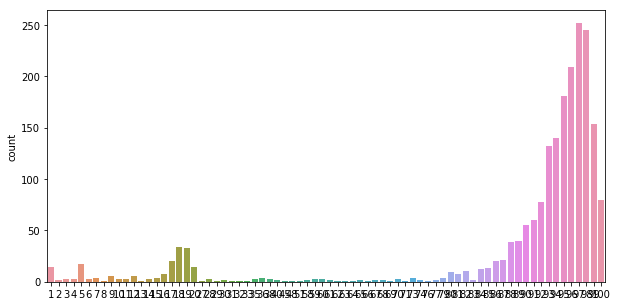

In [6]:
num_players_match = data.groupby(data['matchId'])['playerId'].count().tolist()
plt.figure(figsize = (10,5))
sns.countplot(num_players_match)
plt.show()

Not all matches has 100 players. Thus, we need to create percentage of winPlace, where 1 corresponds to 1st place, and 0 represent the last place.

In [7]:
data['winPlacePerc'] = data.groupby(data['matchId'])['winPlace'].transform(lambda x: (x.max()-x)/(x.max()-x.min()))

In [8]:
data = data.drop(columns=['winPlace'])

In [9]:
data['winPlacePerc'].isnull().sum()

546

In [10]:
data['winPlacePerc'].fillna(0,inplace = True)

# EDA
## 1. Kills
This dataset provide multiple variables relates to **kills**:
- kills
- killStreaks
- killPlace
- killPoints
- headshotKilss
- roadKills
- teamKills
- longestKill

In [11]:
data['kills'].max()

32

In [12]:
data['kills'].mean()

0.8808460485189529

In [13]:
data['kills'].quantile(0.99)

7.0

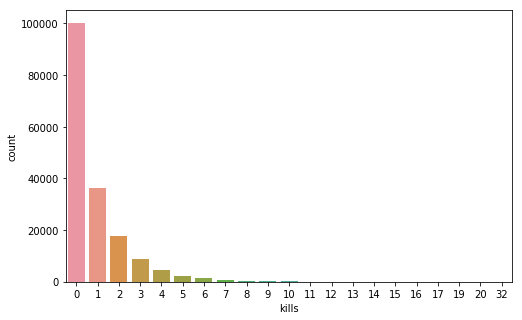

In [14]:
plt.figure(figsize = (8,5))
sns.countplot(data['kills'])
plt.show()

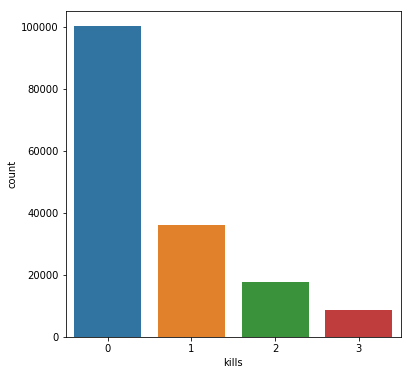

In [15]:
plt.figure(figsize = (6,6))
sns.countplot(data[data['kills'] < data['kills'].quantile(0.95)]['kills'])
plt.show()

### Top 10 players kills
Most of people didn't make a kill for the entire match. Let's look at people ranked top 10 in a match.

In [16]:
top_player = data.loc[data['winPlacePerc'] >= 0.9]

In [17]:
top_player['kills'].mean()

2.5362840071929926

In general, top 10 players make 1.7 more kill than the entire participants.

In [18]:
top_player['kills'].quantile(0.99)

11.0

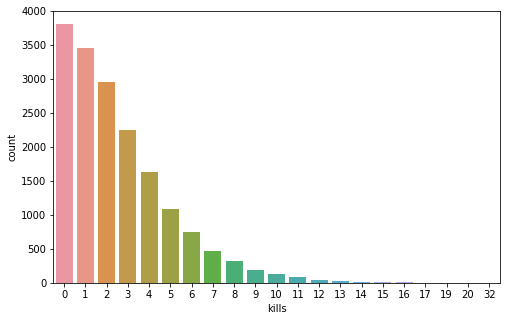

In [19]:
plt.figure(figsize = (8,5))
sns.countplot(top_player['kills'])
plt.show()

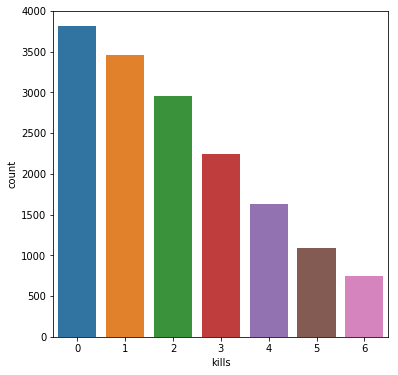

In [20]:
plt.figure(figsize = (6,6))
sns.countplot(top_player[top_player['kills'] < top_player['kills'].quantile(0.95)]['kills'])
plt.show()

### No. 1 players kills
Interesting thing is, even for top 10 players in a match, still some people didn't make a kill or just kill a small number of players. How about top 1?

In [21]:
top_one = data.loc[data['winPlacePerc']==1]

In [22]:
top_one['kills'].mean()

3.2856597288523965

In [23]:
top_one['kills'].quantile(0.99)

12.0

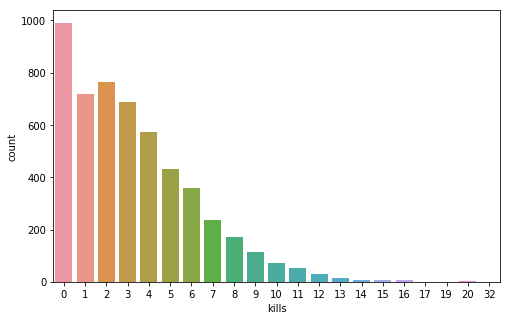

In [24]:
plt.figure(figsize = (8,5))
sns.countplot(top_one['kills'])
plt.show()

**Even some top 1 players didn't make a kill!** <br>
Therefore, contrary to common understanding, large number of kills doesn't guarantee higher ranking. But, what's the relationship between number of kills and ranking?

### Relationship between number of kills and win

In [25]:
df = data[['kills','winPlacePerc']]
df.corr(method='pearson')

,kills,winPlacePerc
kills,1.000000,0.430347
winPlacePerc,0.430347,1.000000


Number of kills have a negative relatinship with winplace.

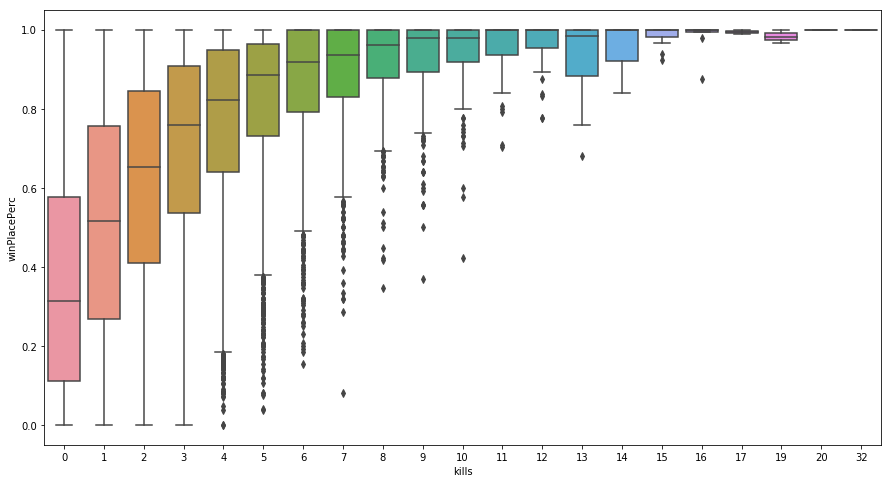

In [26]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data['kills'],y=data['winPlacePerc'])
plt.show()

As the number of kills increase, the distribution of ranking become narrower. 

PUBG provides variable "killPlace", ranking in match of number of enemy players killer. Now let's the relation between killplance and winplace.

### Number of kills group

In [27]:
print('number of kills 50% percentile is: ' + str(data['kills'].quantile(0.5)))
print('number of kills 75% percentile is: ' + str(data['kills'].quantile(0.75)))
print('number of kills 90% percentile is: ' + str(data['kills'].quantile(0.9)))
print('number of kills 95% percentile is: ' + str(data['kills'].quantile(0.95)))
print('number of kills 99% percentile is: ' + str(data['kills'].quantile(0.99)))

number of kills 50% percentile is: 0.0
number of kills 75% percentile is: 1.0
number of kills 90% percentile is: 3.0
number of kills 95% percentile is: 4.0
number of kills 99% percentile is: 7.0


Let's group players based on number of kills: 0 kills, 1-3 kills, 4-7 kill, 7+ kills

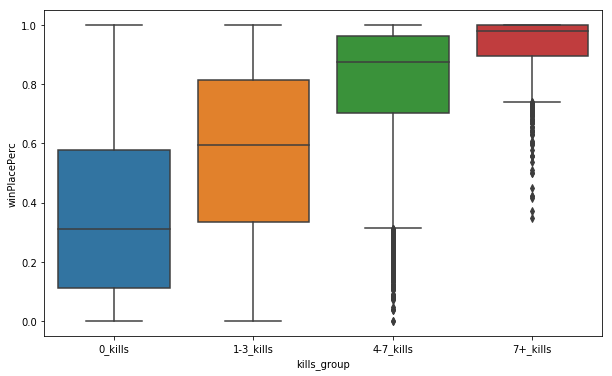

In [28]:
data['kills_group'] = pd.cut(data['kills'], [-1, 0, 3, 7, 40], labels=['0_kills','1-3_kills', '4-7_kills', '7+_kills'])

plt.figure(figsize=(10,6))
sns.boxplot(x=data["kills_group"], y=data["winPlacePerc"])
plt.show()

In [29]:
data = data.drop(columns=['kills_group'])

### Kills on different platform

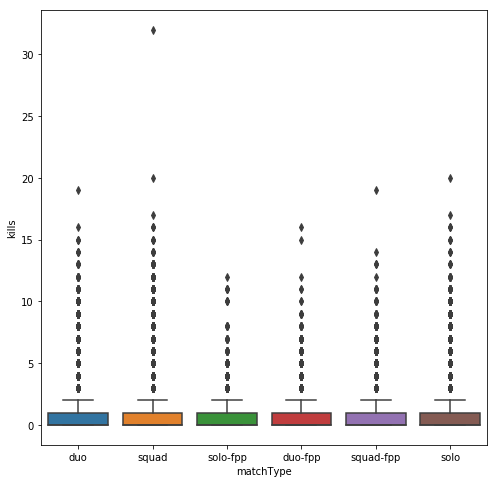

In [30]:
plt.figure(figsize = (8,8))
sns.boxplot(y=data['kills'],x=data['matchType'])
plt.show()

No significant different among different platforms in terms of number of kills

### Different type of kills

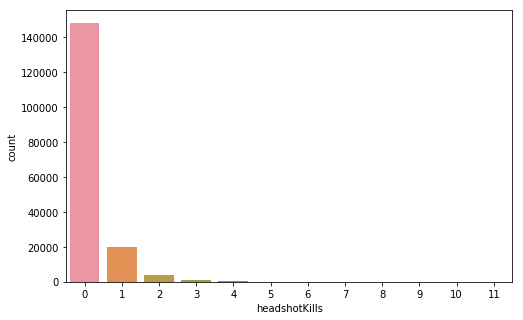

In [31]:
plt.figure(figsize = (8,5))
sns.countplot(data['headshotKills'])
plt.show()

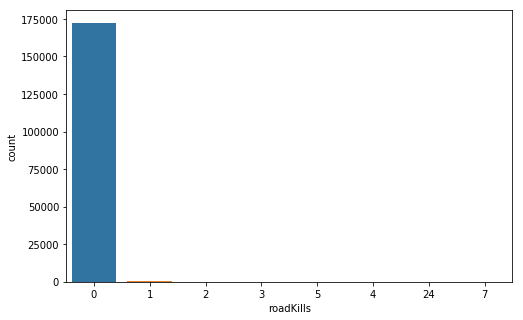

In [32]:
plt.figure(figsize = (8,5))
sns.countplot(data['roadKills'], order = data['roadKills'].value_counts().index)
plt.show()

## 2. Damage

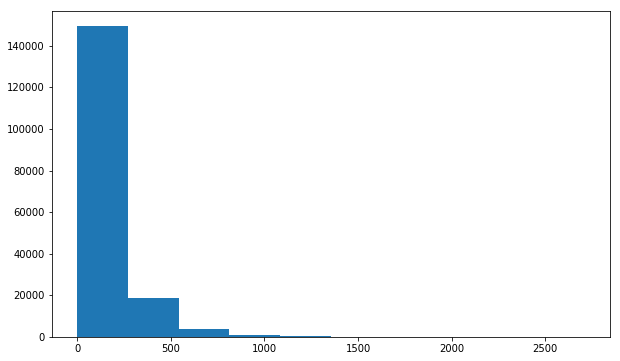

In [33]:
plt.figure(figsize = (10,6))
plt.hist(data['damageDealt'])
plt.show()

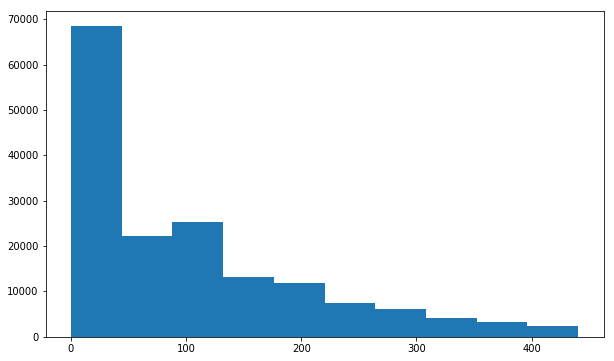

In [34]:
plt.figure(figsize = (10,6))
plt.hist(data[data['damageDealt'] < data['damageDealt'].quantile(0.95)]['damageDealt'])
plt.show()

### Damage and kills
What's the relationship between damage and kills?

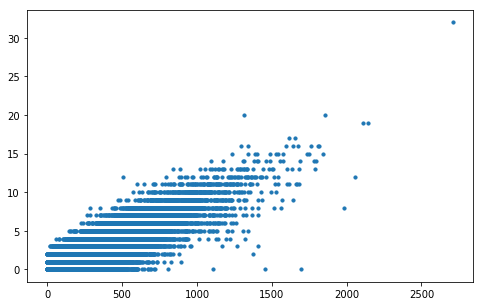

In [35]:
plt.figure(figsize = (8,5))
plt.scatter(x=data['damageDealt'],y=data['kills'],s=10)
plt.show()

### Damage and win

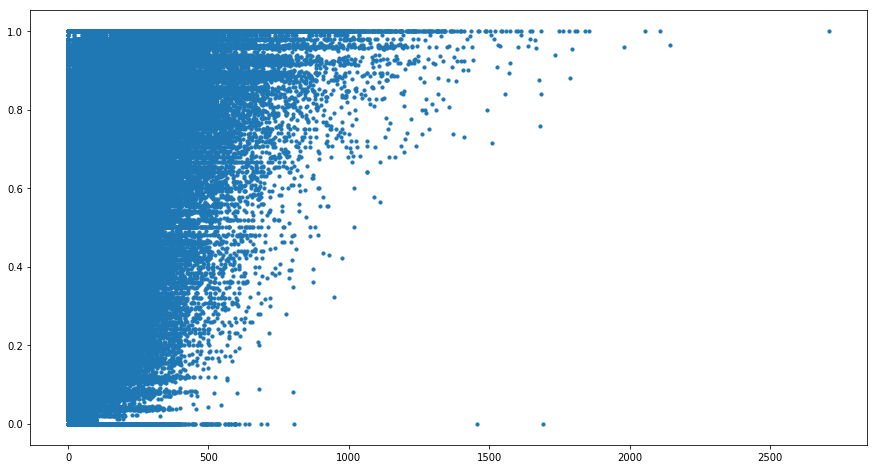

In [36]:
plt.figure(figsize = (15,8))
plt.scatter(x=data['damageDealt'],y=data['winPlacePerc'],s=10)
plt.show()

## 3. Heals and boost
As we know, people who live longer in the game would get a higher rank. There are two types of items for extending life, one is healing item the other is boost item. 

### healing

In [37]:
print('number of heals 50% percentile is: ' + str(data['heals'].quantile(0.5)))
print('number of heals 75% percentile is: ' + str(data['heals'].quantile(0.75)))
print('number of heals 90% percentile is: ' + str(data['heals'].quantile(0.9)))
print('number of heals 99% percentile is: ' + str(data['heals'].quantile(0.99)))

number of heals 50% percentile is: 0.0
number of heals 75% percentile is: 2.0
number of heals 90% percentile is: 5.0
number of heals 99% percentile is: 15.0


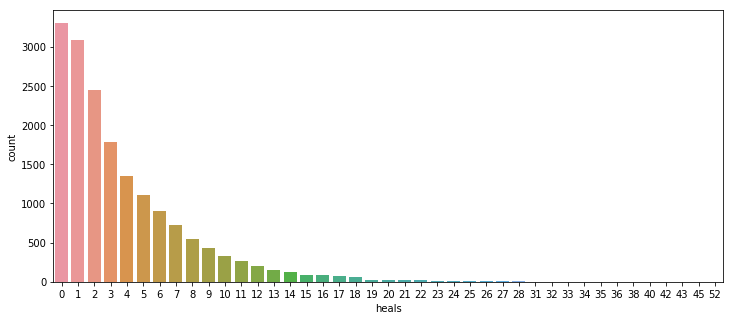

In [38]:
plt.figure(figsize = (12,5))
sns.countplot(top_player['heals'])
plt.show()

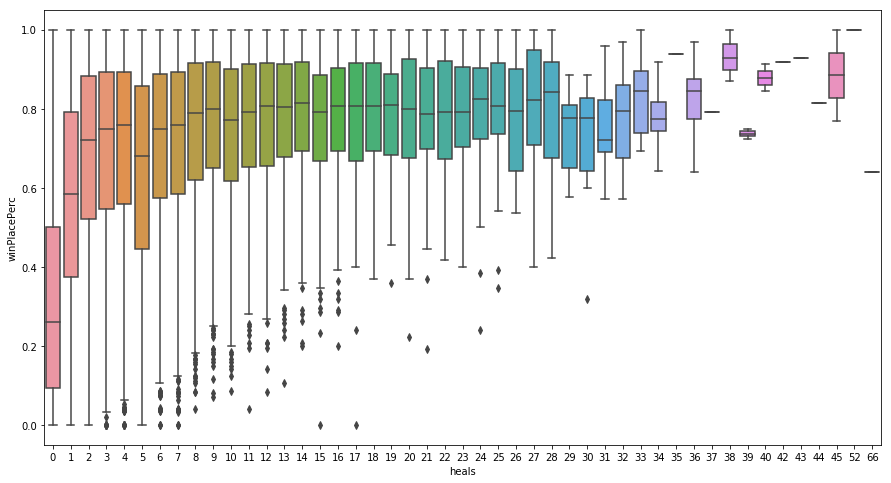

In [39]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data['heals'],y=data['winPlacePerc'])
plt.show()

After people use up 2 healing items, their ranking no longer significantly affected by healing.

### Boost

In [40]:
print('number of boosts 50% percentile is: ' + str(data['boosts'].quantile(0.5)))
print('number of boosts 75% percentile is: ' + str(data['boosts'].quantile(0.75)))
print('number of boosts 90% percentile is: ' + str(data['boosts'].quantile(0.90)))
print('number of boosts 99% percentile is: ' + str(data['boosts'].quantile(0.99)))

number of boosts 50% percentile is: 0.0
number of boosts 75% percentile is: 2.0
number of boosts 90% percentile is: 4.0
number of boosts 99% percentile is: 9.0


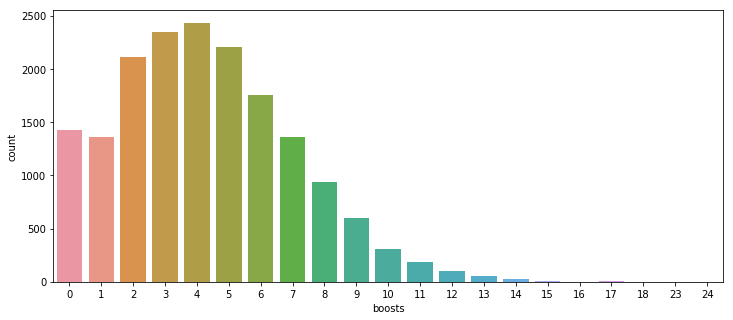

In [41]:
plt.figure(figsize = (12,5))
sns.countplot(top_player['boosts'])
plt.show()

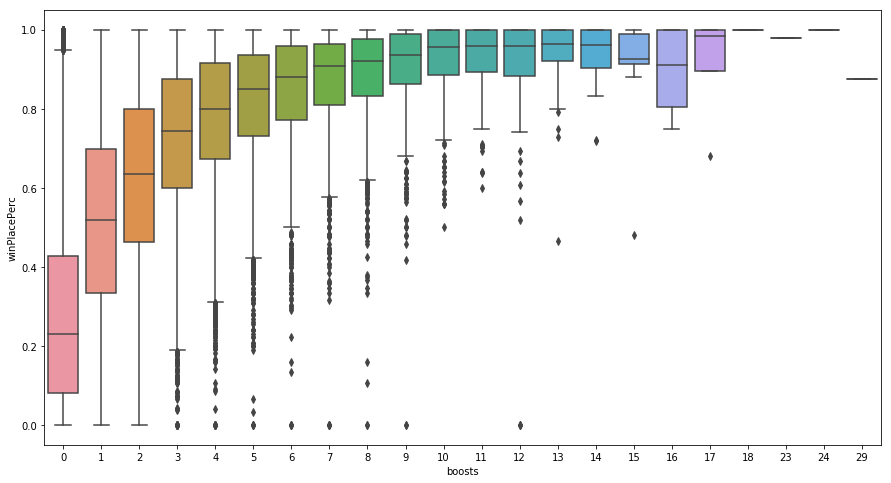

In [42]:
plt.figure(figsize = (15,8))
sns.boxplot(x=data['boosts'],y=data['winPlacePerc'])
plt.show()

Using boost items clearly can improve players ranking.


## 4. Transportation methods
In PUBG, players have to keep moving to get into the **circle** to avoid being killed by system. Therefore, players transportation methods might affect their final ranking.

### Running

In [43]:
print('number of walking distance 25% percentile is: ' + str(data['walkDistance'].quantile(0.25)))
print('number of walking distance 50% percentile is: ' + str(data['walkDistance'].quantile(0.5)))
print('number of walking distance 75% percentile is: ' + str(data['walkDistance'].quantile(0.75)))
print('number of walking distance 90% percentile is: ' + str(data['walkDistance'].quantile(0.90)))
print('number of walking distance 99% percentile is: ' + str(data['walkDistance'].quantile(0.99)))

number of walking distance 25% percentile is: 188.33416499999998
number of walking distance 50% percentile is: 797.9871
number of walking distance 75% percentile is: 1917.0489499999999
number of walking distance 90% percentile is: 2814.65428
number of walking distance 99% percentile is: 4159.565635999992


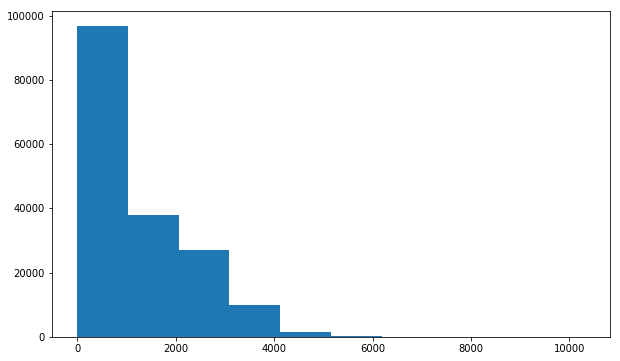

In [44]:
plt.figure(figsize = (10,6))
plt.hist(data['walkDistance'])
plt.show()

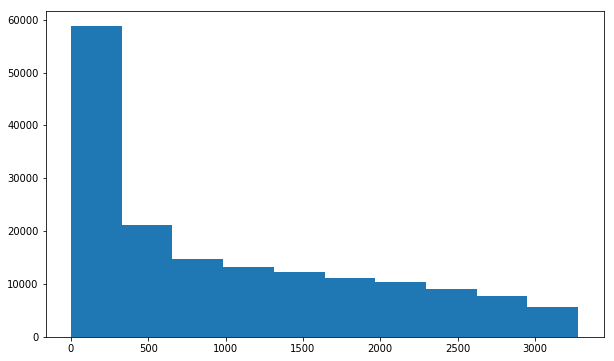

In [45]:
plt.figure(figsize = (10,6))
plt.hist(data[data['walkDistance'] < data['walkDistance'].quantile(0.95)]['walkDistance'])
plt.show()

In [46]:
# how many people no even get the chance to move?
len(data.loc[data['walkDistance']==0])/len(data)

0.034965075366723095

3.4% of players died before they even taking a step.

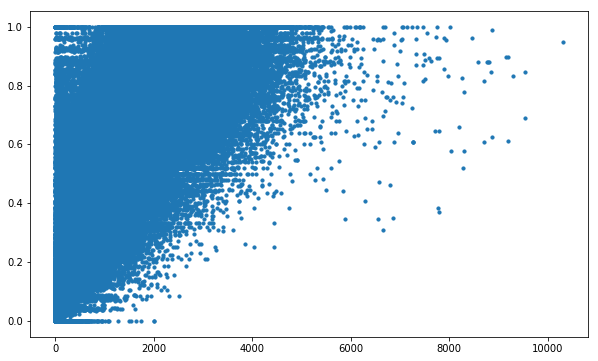

In [47]:
plt.figure(figsize = (10,6))
plt.scatter(x=data['walkDistance'],y=data['winPlacePerc'],s=10)
plt.show()

### Driving

In [48]:
# how many people luckily didn't found a vehicles?
len(data.loc[data['rideDistance']==0])/len(data)

0.6633311571637385

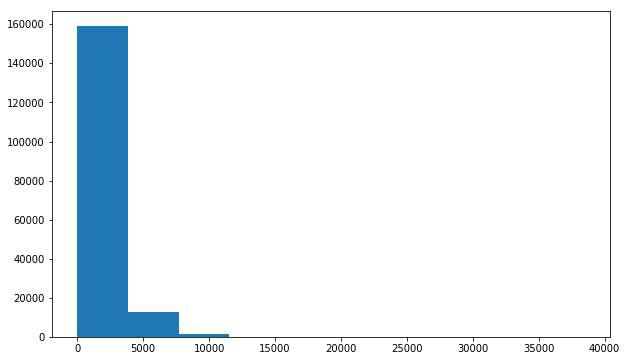

In [49]:
plt.figure(figsize = (10,6))
plt.hist(data['rideDistance'])
plt.show()

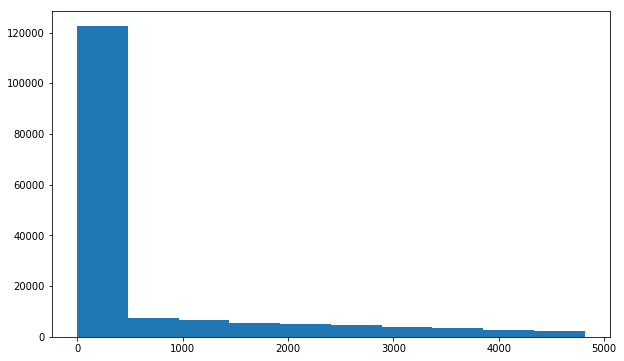

In [50]:
plt.figure(figsize = (10,6))
plt.hist(data[data['rideDistance'] < data['rideDistance'].quantile(0.95)]['rideDistance'])
plt.show()

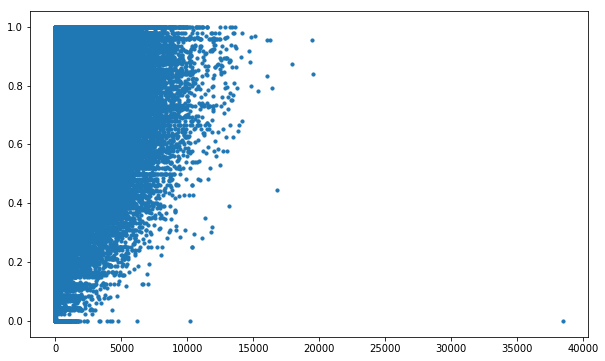

In [51]:
plt.figure(figsize = (10,6))
plt.scatter(x=data['rideDistance'],y=data['winPlacePerc'],s=10)
plt.show()

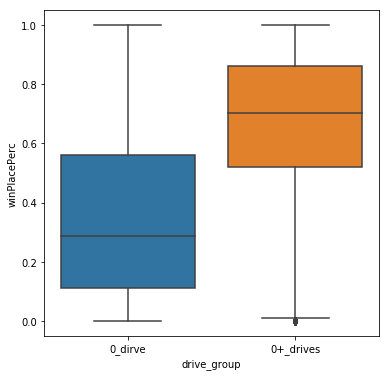

In [52]:
data['drive_group'] = pd.cut(data['rideDistance'], [-1, 0, 50000], labels=['0_dirve','0+_drives'])

plt.figure(figsize=(6,6))
sns.boxplot(x=data["drive_group"], y=data["winPlacePerc"])
plt.show()

In [53]:
data = data.drop(columns=['drive_group'])

Successfully finding and using a vehicle can improve players ranking.

Some players like to destory a vehicle after they used. Usually, this type of palyers are skilled

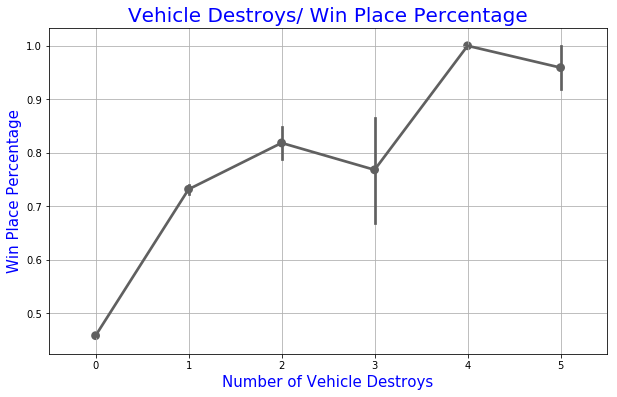

In [54]:
f,ax1 = plt.subplots(figsize =(10,6))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Place Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Place Percentage',fontsize = 20,color='blue')
plt.grid()
plt.show()

## 5. Weapon

Clearly, acquiring a powerful weapon in the game is essential. How many weapons usualy a player can find during a game?

In [55]:
print('number of weapons 25% percentile is: ' + str(data['weaponsAcquired'].quantile(0.25)))
print('number of weapons 50% percentile is: ' + str(data['weaponsAcquired'].quantile(0.50)))
print('number of weapons 75% percentile is: ' + str(data['weaponsAcquired'].quantile(0.75)))
print('number of weapons 90% percentile is: ' + str(data['weaponsAcquired'].quantile(0.90)))
print('number of weapons 99% percentile is: ' + str(data['weaponsAcquired'].quantile(0.99)))

number of weapons 25% percentile is: 2.0
number of weapons 50% percentile is: 4.0
number of weapons 75% percentile is: 5.0
number of weapons 90% percentile is: 7.0
number of weapons 99% percentile is: 11.0


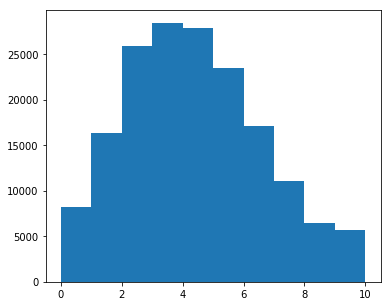

In [56]:
plt.figure(figsize = (6,5))
plt.hist(data[data['weaponsAcquired'] < data['weaponsAcquired'].quantile(0.99)]['weaponsAcquired'])
plt.show()

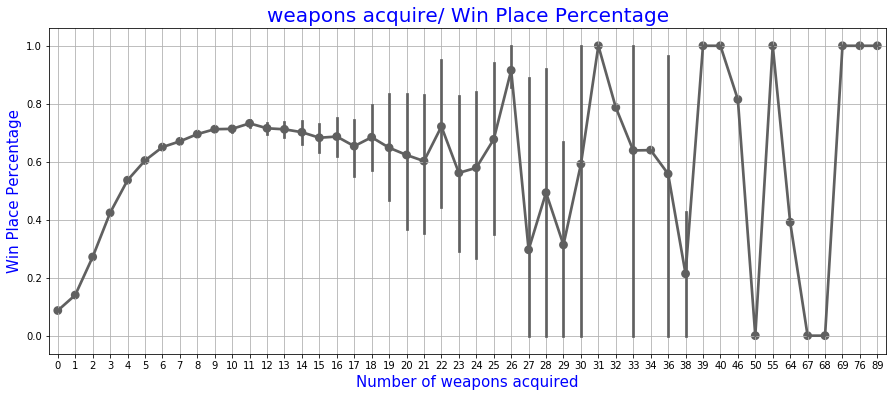

In [57]:
f,ax1 = plt.subplots(figsize =(15,6))
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of weapons acquired',fontsize = 15,color='blue')
plt.ylabel('Win Place Percentage',fontsize = 15,color='blue')
plt.title('weapons acquire/ Win Place Percentage',fontsize = 20,color='blue')
plt.grid()
plt.show()

Since 99% of people acquired less than 11 weapons during one match, if you're a common player, finding more weapons would increase your ranking. However, after finding 6 weapons, the power that weapons can bring not significant any more. You might need to focus on other strategy then.

## 7. correlation

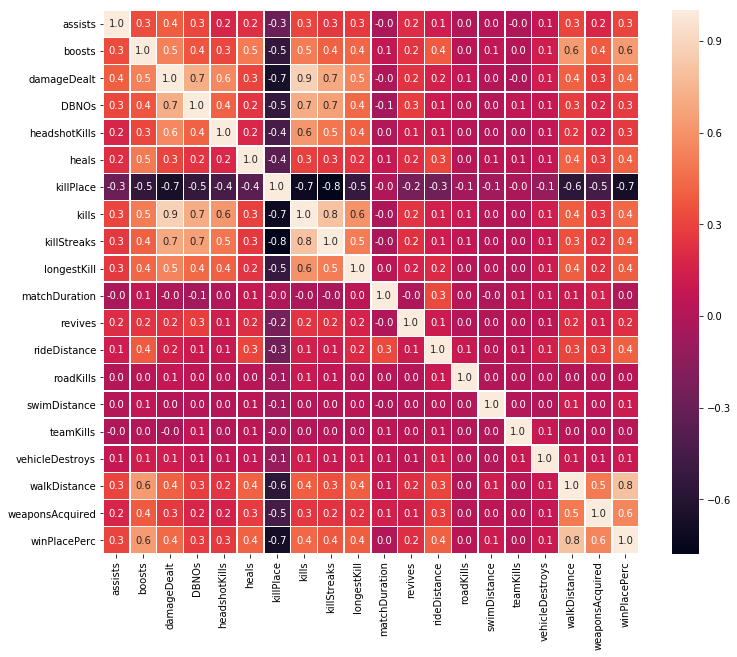

In [58]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

Boosts, killplace, walkdistance and weaponsacquired are highly correlated with winPlace

# Feature Engineering

From the DEA above, we have a rough idea about what variables might contribute the players final ranking. In general, winPlance heavily rely on **usage of items, transportation and weapons** in a match. Therefore, we can generate some useful features around them.

## 1. Usage of items

In [11]:
# total items used
data['item'] = data['heals']+data['boosts']

## 2. Transportation

In [12]:
# total distance
data['distance'] = data['walkDistance'] + data['rideDistance']+data['swimDistance']

Since healing and boosting items both can help players to move and thus stay out of the circle, we create some features to capture relationship between them

In [13]:
data['walkDistance_heals'] = data['walkDistance']/(data['heals']+1) # to avoid inifity
data['walkDistance_boosts'] = data['walkDistance']/(data['boosts']+1)

## 3. Weapons
Weapons are used for kills, let's create features about weapons and kills

In [14]:
data['weapon_kills'] = data['weaponsAcquired']/(data['kills']+1)

## 4.Teamwork
We noticed that some top-ranking players even didn't make a kill during one match, which seems wierd. The reason behind this is that the winplace is determined by group. Even if a player killed at the begining of the game, he/she still can get a high rank if his/her teammates survived till the end. Therefore, we might want create some feature about teamwork

In [15]:
data['teamwork'] = data['assists']+data['revives']

# Modeling
## 1. Data preprocessing
To apply the LGB model, we need to transform variable types to float/int.

In [16]:
def transfrom_data(column):
    le = LabelEncoder()
    le.fit(list(data[col]))
    data[col] = le.transform(data[col])
    return data

In [17]:
for col in data.columns:
    if data[col].dtypes == "object":
        data = transfrom_data(col)

## 2. Split data

In [18]:
def random_sample(data, num_match):
    match_ids = data['matchId'].unique().tolist()
    random_matches = random.sample(match_ids, num_match)
    sample_data = data.loc[data['matchId'].isin(random_matches)]
    return sample_data

In [19]:
# we need to split train and test sets by match
def split_data(data, split_percent = 0.2):
    match_ids = data['matchId'].unique().tolist()
    train_matches = random.sample(match_ids, int(len(match_ids)*(1-split_percent)))
    
    train = data.loc[data['matchId'].isin(train_matches)]
    test = data.loc[~data['matchId'].isin(train_matches)]
    
    return train, test

In [20]:
train,test = split_data(data)

In [21]:
# drop match id and player id
train = train.drop(columns=['playerId','matchId','matchDuration'])
test = test.drop(columns=['playerId','matchId','matchDuration'])


In [22]:
train.head(3).transpose()

,0,1,2
assists,0.000000,0.000000,0.000000
boosts,1.000000,0.000000,1.000000
damageDealt,100.000000,122.394394,96.555000
DBNOs,1.000000,0.000000,0.000000
headshotKills,0.000000,0.000000,0.000000
heals,3.000000,0.000000,0.000000
killPlace,27.000000,61.000000,50.000000
kills,1.000000,0.000000,0.000000
killStreaks,1.000000,0.000000,0.000000
longestKill,3.997975,0.000000,0.000000


## 3. Training using CV

In [28]:
params = {
                    'objective':'regression',
                    'boosting_type':'gbdt',#traditional Gradient Boosting Decision Tree, aliases:
                    'metric':'rmse',
                    'learning_rate':0.005,
                    'num_leaves': 2**8,
                    'max_depth':-1,
                    'early_stopping_rounds':250,
                    'tree_learner':'serial',
                    'colsample_bytree': 0.5,
                    'subsample_freq':1,
                    'subsample':0.7,
                    'max_bin':255,
                    'seed': 1234,
                } 

In [35]:
class LGB():
    def __init__(self, train, test, num_cv, parameter):
        self.train = train
        self.test = test
        self.num_cv = num_cv
        self.parameter = parameter
    
    def split(self):
        self.train_y = self.train['winPlacePerc']
        self.train_x = self.train.drop(['winPlacePerc'],axis=1)
        self.test_y = self.test['winPlacePerc']
        self.test_x = self.test.drop(['winPlacePerc'],axis=1)
        
    def cross_validation(self):
        folds = KFold(n_splits=self.num_cv, shuffle=True, random_state=1234)
        columns = self.train_x.columns
        self.splits = folds.split(self.train_x, self.train_y)
    
    def training(self):
        self.split()
        self.cross_validation()
        
        y_pred_test_vectors = np.zeros(self.test_x.shape[0])
        y_pred_valid_vectors = np.zeros(self.train_y.shape[0])
        
        train_mse = 0
        valid_mse = 0
        
        for fold_n, (train_index, valid_index) in enumerate(self.splits):
            x_train = self.train_x.iloc[train_index] 
            x_valid = self.train_x.iloc[valid_index]
            y_train = self.train_y.iloc[train_index] 
            y_valid = self.train_y.iloc[valid_index]
            
            dtrain = lgb.Dataset(x_train, label=y_train)
            dvalid = lgb.Dataset(x_valid, label=y_valid)

            model = lgb.train(self.parameter, dtrain, 10000, valid_sets = [dtrain, dvalid],verbose_eval=False)

            # Predict and put OOF predicted data into holdout position
            y_pred_train = model.predict(x_train)
            y_pred_valid = model.predict(x_valid)
            y_pred_valid_vectors[valid_index] = y_pred_valid

            # Averaging mse
            train_mse += mean_squared_error(y_train, y_pred_train) / self.num_cv
            valid_mse += mean_squared_error(y_valid, y_pred_valid) / self.num_cv

            # Averaging predicting value
            y_pred_test_vectors += model.predict(self.test_x) / self.num_cv

            del x_train, x_valid, y_train, y_valid

            #gabage collector
            gc.collect()
        return model, train_mse, valid_mse, y_pred_test_vectors

Now, using different numbers of samples for training and validation.

In [36]:
data['matchId'].nunique()

2007

In [37]:
match_nums = [100*i for i in range(1,20)] + [2007]

In [ ]:
%%time
train_mse_lst = []
valid_mse_lst = []
y_pred_test = []
for num in match_nums:
    start_time = time.time()
    dataset = random_sample(data,num)
    train_set, test_set = split_data(dataset)
    model_lgb = LGB(train_set, test_set, 5, params)
    model, train_mse, valid_mse, y_pred_test_vectors = model_lgb.training()
    train_mse_lst.append(train_mse)
    valid_mse_lst.append(valid_mse)
    y_pred_test.append(y_pred_test_vectors)
    print('Finish training for number of samples: ' + str(num))
    print('time used {}'.format(time.time()-start_time))
    print('-'*20)

Finish training for number of samples: 100
time used 308.14857721328735
--------------------
Finish training for number of samples: 200
time used 645.7118673324585
--------------------
Finish training for number of samples: 300
time used 763.9683685302734
--------------------
Finish training for number of samples: 400
time used 841.9804491996765
--------------------
Finish training for number of samples: 500
time used 1003.2569785118103
--------------------
Finish training for number of samples: 600
time used 1096.120408296585
--------------------
Finish training for number of samples: 700
time used 1153.4635207653046
--------------------
Finish training for number of samples: 800
time used 1221.1649296283722
--------------------
Finish training for number of samples: 900
time used 1299.8219969272614
--------------------
Finish training for number of samples: 1000
time used 1360.264307975769
--------------------
Finish training for number of samples: 1100
time used 1412.37317943573
---

In [172]:
valid_mse_lst

[0.01805354411307778,
 0.01563523494561226,
 0.01455574296986525,
 0.014334404165644386,
 0.013951984367264518,
 0.013945090949861228,
 0.013731368848191977,
 0.013127956847863933,
 0.012828233370049085,
 0.012501873164482258,
 0.012343620119773933,
 0.01269995237475461,
 0.012498492208656894,
 0.01219163237252625,
 0.011968851629035776,
 0.011827752485329551,
 0.01163358903930151,
 0.011641107618837816,
 0.0115671631332569,
 0.01157289110303113]

In [155]:
mean_squared_error(small_test['winPlacePerc'],y_pred_test_vectors)

0.08585326779944535

In [77]:
%%time

y_pred_test_vectors = np.zeros(test_x.shape[0])
y_pred_valid_vectors = np.zeros(train_y.shape[0])
score = 0
train_mse = [[0]*NFOLDS]
valid_mse = [[0]*NFOLDS]
epochs = []

feature_importances = pd.DataFrame()
feature_importances['feature'] = train_x.columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    start_time = time.time()
    x_train = train_x[columns].iloc[train_index] 
    x_valid = train_x[columns].iloc[valid_index]
    y_train = train_y.iloc[train_index] 
    y_valid = train_y.iloc[valid_index]
    
    dtrain = lgb.Dataset(x_train, label=y_train)
    dvalid = lgb.Dataset(x_valid, label=y_valid)
    
    # Train
    model= lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=250, early_stopping_rounds=250)
 
    # Record feature importance
    feature_importances['fold_{}'.format(fold_n + 1)] = model.feature_importance()
    
    # Predict and put OOF predicted data into holdout position
    y_pred_train = model.predict(x_train)
    y_pred_valid = model.predict(x_valid)
    y_pred_valid_vectors[valid_index] = y_pred_valid
    
    # record mse
    train_mse[fold_n].append(mean_squared_error(y_train, y_pred_train))
    valid_mse[fold_n].append(mean_squared_error(y_valid, y_pred_valid))
    epochs[fold_n].append()
    
    print("Fold {} | RMSE: {}".format((fold_n + 1),mean_squared_error(y_valid, y_pred_valid)))
    print('time used {}'.format(time.time()-start_time))
    
    # Averaging auc score
    score += mean_squared_error(y_valid, y_pred_valid) / 5
    
    # Averaging predicting value
    y_pred_test_vectors += model.predict(test_x) / 5
    
    del x_train, x_valid, y_train, y_valid
    
    #gabage collector
    gc.collect()


Training until validation scores don't improve for 250 rounds
[250]	training's rmse: 0.139187	valid_1's rmse: 0.142225
[500]	training's rmse: 0.101945	valid_1's rmse: 0.107901
[750]	training's rmse: 0.0924469	valid_1's rmse: 0.100625
[1000]	training's rmse: 0.0878088	valid_1's rmse: 0.0978988
[1250]	training's rmse: 0.0844508	valid_1's rmse: 0.0962642
[1500]	training's rmse: 0.0817774	valid_1's rmse: 0.0951763
[1750]	training's rmse: 0.0796217	valid_1's rmse: 0.0944987
[2000]	training's rmse: 0.0778235	valid_1's rmse: 0.0940663
[2250]	training's rmse: 0.0762431	valid_1's rmse: 0.0937543
[2500]	training's rmse: 0.0747739	valid_1's rmse: 0.0934813
[2750]	training's rmse: 0.0733978	valid_1's rmse: 0.0932741
[3000]	training's rmse: 0.0721602	valid_1's rmse: 0.0931168
[3250]	training's rmse: 0.0709854	valid_1's rmse: 0.09301
[3500]	training's rmse: 0.0699042	valid_1's rmse: 0.0929127
[3750]	training's rmse: 0.0688192	valid_1's rmse: 0.0928205
[4000]	training's rmse: 0.0677997	valid_1's rmse

Fold 4 | RMSE: 0.008365582504540623
time used 211.3959732055664
Training until validation scores don't improve for 250 rounds
[250]	training's rmse: 0.139751	valid_1's rmse: 0.140691
[500]	training's rmse: 0.102579	valid_1's rmse: 0.105174
[750]	training's rmse: 0.0930841	valid_1's rmse: 0.0976733
[1000]	training's rmse: 0.08845	valid_1's rmse: 0.0948891
[1250]	training's rmse: 0.0851019	valid_1's rmse: 0.0932349
[1500]	training's rmse: 0.08248	valid_1's rmse: 0.0921232
[1750]	training's rmse: 0.0802996	valid_1's rmse: 0.0914655
[2000]	training's rmse: 0.0785243	valid_1's rmse: 0.0910846
[2250]	training's rmse: 0.0769145	valid_1's rmse: 0.0907529
[2500]	training's rmse: 0.0754481	valid_1's rmse: 0.0905066
[2750]	training's rmse: 0.0740628	valid_1's rmse: 0.0902933
[3000]	training's rmse: 0.0728052	valid_1's rmse: 0.0901353
[3250]	training's rmse: 0.0716143	valid_1's rmse: 0.0900433
[3500]	training's rmse: 0.070501	valid_1's rmse: 0.0899434
[3750]	training's rmse: 0.0694296	valid_1's rm

In [84]:
mean_squared_error(test_y, y_pred_test_vectors)

0.010409980393180399

## 4. Feature importance

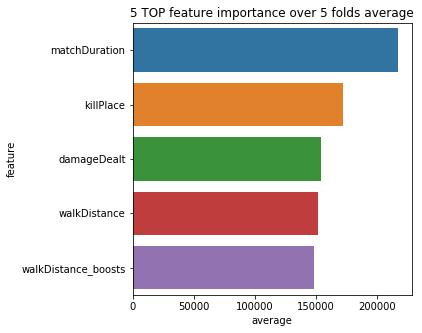

In [83]:
feature_importances['average'] = feature_importances.mean(axis = 1)
plt.figure(figsize=(5, 5))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(5), x='average', y='feature');
plt.title('5 TOP feature importance over {} folds average'.format(folds.n_splits));